-----------------------------------------------------------------------

### FashionMNIST Classification using Keras Tutorial

Define Neural Network to classify images of clothing (FashionMNIST dataset)

Dataset contains:
        
        1) 70,000 grayscale images in 10 categories
        2) each image is 28*28 pixels

#### Sorce code : Tensorflow Keras Documentation

[Check here for tensorflow documentation](https://www.tensorflow.org/tutorials/keras/basic_classification)

--------------------------------------------------------------


#### Importing keras, tensorflow, numpy and matplotlib

In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


#### loading FashionMNIST Dataset

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


#### defining class_names list to contain each categories- total 10 classes

In [58]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

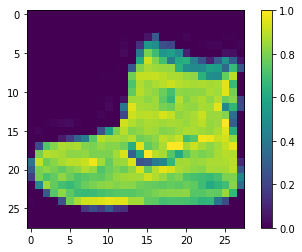

In [28]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

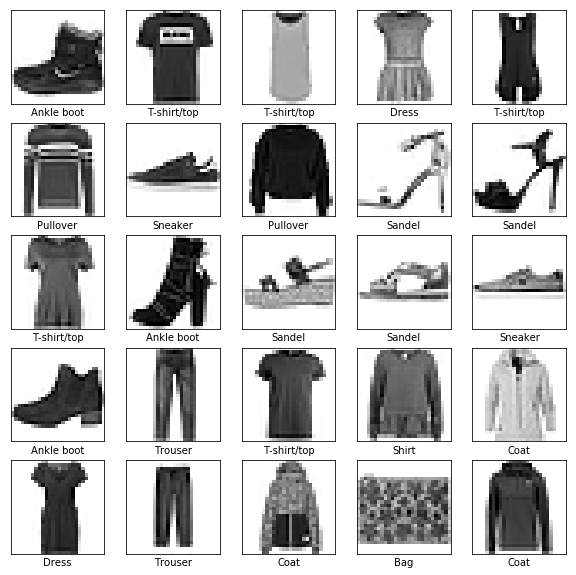

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

#### defining model by stacking different layers
``` tf.keras.layers.Flatten ```  is used for transforming the image format from 2-D (28 * 28) array to 1-D (28 * 28 = 784)array

``` tf.keras.layers.Dense ```    this layers are fully-connected neural layers and contains parameters that are learned during training

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the model to check if it is ready for training
##### steps involves
    1) Loss function:  minimize this function to steer the model in the right direction
    2) Optimizer:  how model is updated based on feeded data and loss function
    3) Metrics:  used to monitor training and testing steps

In [37]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
model.fit(train_images,train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.4988 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.3744 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.3377 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.3118 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.2952 - acc: 0.8916


In [39]:
test_loss,test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.8692


In [40]:
predictions = model.predict(test_images)

In [41]:
predictions[0]

array([4.2445899e-06, 6.7655087e-08, 4.3285729e-07, 4.3896971e-08,
       2.4859747e-07, 6.4376727e-02, 1.3268652e-05, 7.7636518e-02,
       2.1032163e-05, 8.5794741e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
test_labels[0]

9

In [64]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
    
def plot_value_array(i, predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
               
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')           
               
               
               

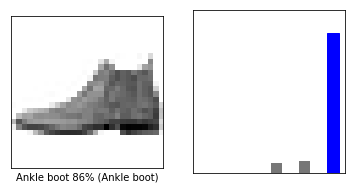

In [65]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

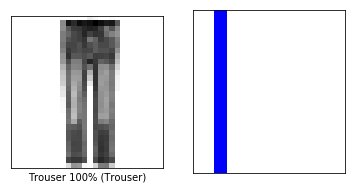

In [67]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

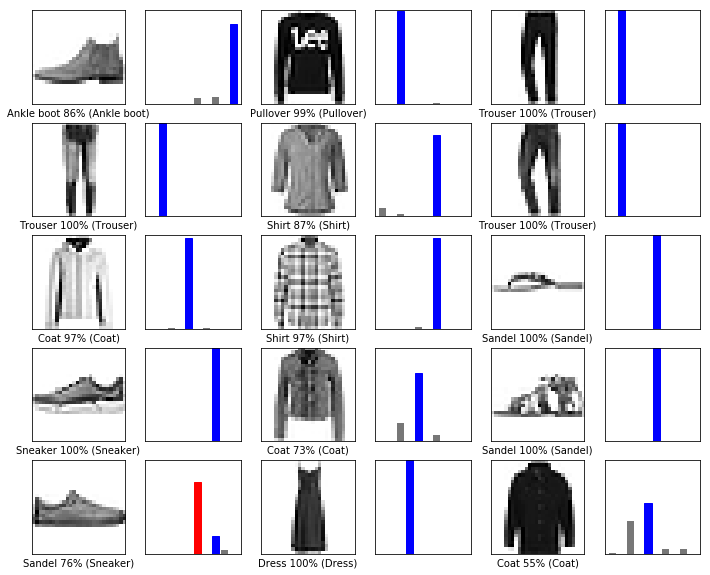

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions, test_labels)

In [70]:
img =test_images[0]

print(img.shape)

(28, 28)


In [71]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [72]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2445859e-06 6.7655215e-08 4.3285775e-07 4.3896971e-08 2.4859773e-07
  6.4376682e-02 1.3268639e-05 7.7636518e-02 2.1032143e-05 8.5794741e-01]]


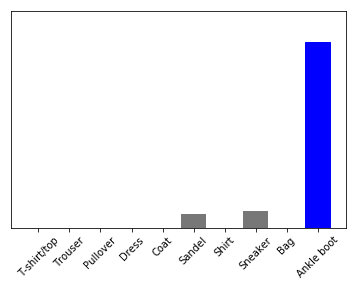

In [73]:
plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

In [74]:
np.argmax(predictions_single[0])

9